## [9] 분류 실습 - 캐글 산탄데르 고객 만족 예측

### [데이터 전처리]

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

cust_df = pd.read_csv("/content/drive/MyDrive/2024-2 ESAA/Data/train_santander.csv.csv", encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [33]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [34]:
# 전체 데이터에서 만족, 불만족 비율 알아보기 > Traget 레이블 분포
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [35]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [36]:
# 전처리 1: 예외 값인 -999999를 최빈값인 2로 변환
# 전처리 2: ID 피처는 단순 식별자이므로 피처 드롭
# 피처 세트와 레이블 세트 분리

cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrmae의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [37]:
# 학습 데이터, 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt=y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [38]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimator는 500으로, random state는 예제 수행 시마다 동일한 예측 결과 위해 설정.
# 성능 평가 지표를 auc로, 조기 중단 파라미터 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156,
                        eval_metric="auc",
                        early_stopping_rounds=100)
# 학습 수행.
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

In [40]:
# HyperOpt를 이용해 베이지안 최적화 기반으로 XGBoost 하이퍼 파라미터 튜닝 수행.

from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight':hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [41]:
# 3Fold 교차검증 이용한 성능평가

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환.
def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'],
                          early_stopping_rounds= 30,
                          eval_metric="auc")

   # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
  roc_auc_list = []
  # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습/검증용 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 평균 roc auc 계산 위해 list에 결과 담음. (early stopping 설정은 위에서.)
    xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=False)
    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1], average='macro')
    roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc-auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로, -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [42]:
# fmin()으로 최적의 하이퍼 파라미터 도출해보기
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수 지정.
            trials=trials, rstate = np.random.default_rng(seed=30))

print('best:', best)

100%|██████████| 50/50 [14:23<00:00, 17.28s/trial, best loss: -0.8369805314638166]
best: {'colsample_bytree': 0.6848964687546426, 'learning_rate': 0.0709453695953271, 'max_depth': 6.0, 'min_child_weight': 5.0}


In [76]:
# 도출된 최적의 하이퍼 파라미터를 기반으로 XGBClassifier을 재학습, 테스트 데이터 세트에서 ROC-AUC 측정

# n_estimator는 500으로 증가
# early_stopping_rounds는 100
# evaluation metric은 auc 설정
xgb_clf = XGBClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc',
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        learning_rate=round(best['learning_rate'], 5),
                        colsample_bytree=round(best['colsample_bytree'], 5)
                        )

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.77300	validation_1-auc:0.74131
[1]	validation_0-auc:0.77767	validation_1-auc:0.73880
[2]	validation_0-auc:0.82897	validation_1-auc:0.80110
[3]	validation_0-auc:0.84076	validation_1-auc:0.81537
[4]	validation_0-auc:0.84568	validation_1-auc:0.81988
[5]	validation_0-auc:0.84967	validation_1-auc:0.82374
[6]	validation_0-auc:0.84745	validation_1-auc:0.82095
[7]	validation_0-auc:0.85129	validation_1-auc:0.82262
[8]	validation_0-auc:0.85048	validation_1-auc:0.82165
[9]	validation_0-auc:0.84749	validation_1-auc:0.81894
[10]	validation_0-auc:0.85099	validation_1-auc:0.82163
[11]	validation_0-auc:0.85261	validation_1-auc:0.82383
[12]	validation_0-auc:0.85196	validation_1-auc:0.82274
[13]	validation_0-auc:0.85114	validation_1-auc:0.82184
[14]	validation_0-auc:0.84916	validation_1-auc:0.81919
[15]	validation_0-auc:0.85248	validation_1-auc:0.82280
[16]	validation_0-auc:0.85427	validation_1-auc:0.82471
[17]	validation_0-auc:0.85334	validation_1-auc:0.82376
[18]	validation_0-au

ValueError: feature_names mismatch: ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var40_0', 'num_var40', 'num_var41_0', 'num_var41', 'num_var39', 'num_var42_0', 'num_var42', 'num_var44_0', 'num_var44', 'num_var46_0', 'num_var46', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var18', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var33', 'saldo_var34', 'saldo_var37', 'saldo_var40', 'saldo_var41', 'saldo_var42', 'saldo_var44', 'saldo_var46', 'var36', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'var21', 'num_var2_0_ult1', 'num_var2_ult1', 'num_aport_var13_hace3', 'num_aport_var13_ult1', 'num_aport_var17_hace3', 'num_aport_var17_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_var7_recib_ult1', 'num_compra_var44_hace3', 'num_compra_var44_ult1', 'num_ent_var16_ult1', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3', 'num_meses_var8_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'num_meses_var13_largo_ult3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var39_vig_ult3', 'num_meses_var44_ult3', 'num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var40_comer_ult1', 'num_op_var40_comer_ult3', 'num_op_var40_efect_ult1', 'num_op_var40_efect_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1', 'num_op_var39_efect_ult3', 'num_reemb_var13_hace3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_sal_var16_ult1', 'num_var43_emit_ult1', 'num_var43_recib_ult1', 'num_trasp_var11_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_hace3', 'num_trasp_var33_out_ult1', 'num_venta_var44_hace3', 'num_venta_var44_ult1', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_var2_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2', 'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38'] ['Amount_Scaled', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
expected ind_var2, num_var13_corto, num_trasp_var33_out_ult1, saldo_medio_var13_corto_hace2, ind_var8, num_trasp_var17_out_hace3, num_aport_var33_hace3, imp_venta_var44_ult1, ind_var24, ind_var41_0, num_var7_recib_ult1, imp_op_var41_comer_ult3, num_reemb_var13_ult1, imp_op_var41_efect_ult1, saldo_var37, num_var35, saldo_medio_var33_hace3, imp_op_var41_efect_ult3, ind_var19, num_compra_var44_hace3, ind_var13_medio_0, ind_var10cte_ult1, imp_op_var40_comer_ult1, ind_var34, ind_var37_cte, delta_imp_reemb_var33_1y3, var36, num_var12_0, imp_var43_emit_ult1, num_reemb_var17_hace3, num_var45_ult3, num_var43_recib_ult1, num_var32, num_var37, imp_reemb_var13_ult1, num_var42, num_op_var39_hace2, saldo_medio_var29_hace3, num_var27, num_venta_var44_ult1, num_var13_medio, ind_var32_0, ind_var43_emit_ult1, ind_var6, ind_var17_0, num_var30_0, delta_imp_aport_var13_1y3, num_trasp_var33_in_ult1, num_op_var39_hace3, ind_var46, num_aport_var13_hace3, num_var31_0, num_med_var45_ult3, var38, num_var24_0, delta_num_reemb_var13_1y3, ind_var24_0, num_trasp_var33_in_hace3, ind_var27_0, saldo_medio_var29_hace2, num_trasp_var17_out_ult1, num_trasp_var17_in_ult1, num_var26, saldo_medio_var17_hace2, imp_aport_var33_hace3, num_sal_var16_ult1, saldo_medio_var44_ult1, saldo_var8, imp_op_var39_comer_ult1, delta_imp_reemb_var17_1y3, ind_var18_0, var21, imp_trasp_var33_in_ult1, num_var2_ult1, ind_var26_cte, saldo_var14, ind_var5, num_var28_0, imp_compra_var44_ult1, ind_var7_recib_ult1, var15, num_op_var40_comer_ult3, num_op_var39_efect_ult3, saldo_var40, num_var45_hace2, num_op_var41_efect_ult3, saldo_var5, imp_op_var39_efect_ult1, saldo_var13_corto, ind_var37_0, num_op_var39_comer_ult3, num_var33, num_op_var39_ult3, ind_var8_0, delta_imp_trasp_var33_in_1y3, delta_num_aport_var17_1y3, saldo_medio_var13_medio_ult1, num_var39, num_var22_hace2, num_var8_0, num_var30, num_med_var22_ult3, num_var1, saldo_medio_var5_ult1, saldo_medio_var5_ult3, num_op_var40_ult1, saldo_var20, num_var45_hace3, delta_num_compra_var44_1y3, saldo_var26, saldo_medio_var33_hace2, saldo_var32, num_op_var41_efect_ult1, saldo_medio_var5_hace2, saldo_medio_var33_ult1, delta_num_reemb_var17_1y3, imp_trasp_var17_out_hace3, ind_var13_largo_0, num_var34_0, ind_var13_0, saldo_medio_var13_largo_ult1, num_meses_var5_ult3, saldo_medio_var13_largo_hace2, num_var5, num_var32_0, ind_var29, saldo_var44, num_var25_0, num_meses_var13_largo_ult3, num_var28, saldo_var6, num_meses_var39_vig_ult3, num_var26_0, saldo_var31, delta_imp_compra_var44_1y3, imp_trasp_var33_out_ult1, saldo_medio_var13_largo_ult3, saldo_medio_var17_ult1, num_op_var41_comer_ult3, num_var17_0, num_var24, imp_aport_var13_hace3, num_reemb_var33_ult1, saldo_medio_var13_corto_ult3, delta_num_trasp_var17_in_1y3, imp_trasp_var17_out_ult1, ind_var30_0, num_meses_var12_ult3, delta_num_venta_var44_1y3, num_var8, ind_var10_ult1, ind_var25_0, ind_var32_cte, saldo_var41, imp_venta_var44_hace3, ind_var9_cte_ult1, imp_trasp_var17_in_ult1, num_var27_0, num_trasp_var11_ult1, saldo_var46, delta_num_aport_var33_1y3, num_meses_var13_corto_ult3, num_var40, num_compra_var44_ult1, imp_reemb_var13_hace3, imp_reemb_var17_ult1, num_var22_hace3, num_var14_0, ind_var46_0, ind_var14, saldo_var17, ind_var20, saldo_var12, ind_var9_ult1, num_var1_0, ind_var13_largo, saldo_var33, ind_var26, num_var18_0, saldo_medio_var12_hace3, num_meses_var33_ult3, imp_var7_recib_ult1, imp_reemb_var33_hace3, saldo_medio_var12_hace2, saldo_var30, num_var18, num_op_var40_efect_ult3, imp_compra_var44_hace3, delta_imp_trasp_var17_out_1y3, delta_num_trasp_var17_out_1y3, num_reemb_var17_ult1, delta_num_reemb_var33_1y3, num_var39_0, num_meses_var17_ult3, imp_op_var40_ult1, num_var41_0, saldo_medio_var13_corto_hace3, imp_trasp_var33_out_hace3, num_ent_var16_ult1, num_var33_0, num_aport_var13_ult1, ind_var12_0, num_var7_emit_ult1, saldo_medio_var13_largo_hace3, saldo_medio_var29_ult1, num_var29_0, saldo_var27, ind_var13_medio, saldo_medio_var17_hace3, num_meses_var8_ult3, saldo_medio_var44_hace3, ind_var26_0, num_var13_largo_0, num_op_var41_comer_ult1, num_op_var41_hace2, ind_var2_0, ind_var37, num_var6, num_var13_0, num_var44_0, saldo_medio_var12_ult3, saldo_medio_var8_ult1, num_var22_ult1, num_var34, saldo_var13_medio, num_var31, ind_var5_0, ind_var18, num_op_var40_hace3, imp_amort_var18_hace3, num_reemb_var13_hace3, ind_var40_0, ind_var39_0, ind_var25_cte, num_meses_var13_medio_ult3, num_var2_0_ult1, ind_var28, delta_imp_reemb_var13_1y3, ind_var20_0, ind_var12, saldo_var28, imp_op_var41_comer_ult1, num_var41, ind_var33_0, imp_aport_var17_hace3, imp_reemb_var33_ult1, imp_op_var39_efect_ult3, imp_reemb_var17_hace3, ind_var39, imp_amort_var34_hace3, num_var13_medio_0, imp_var7_emit_ult1, delta_imp_venta_var44_1y3, imp_trasp_var17_in_hace3, num_aport_var17_ult1, ind_var13_corto, num_op_var39_comer_ult1, num_var14, num_reemb_var33_hace3, imp_op_var40_efect_ult3, num_aport_var33_ult1, delta_imp_amort_var18_1y3, saldo_var29, delta_imp_aport_var17_1y3, imp_aport_var17_ult1, num_op_var41_hace3, imp_op_var40_comer_ult3, saldo_medio_var13_medio_hace2, ind_var17, num_var13, delta_num_trasp_var33_out_1y3, saldo_medio_var13_medio_hace3, ind_var31_0, num_var20_0, saldo_medio_var13_corto_ult1, imp_sal_var16_ult1, num_op_var40_comer_ult1, num_var42_0, num_aport_var17_hace3, saldo_medio_var12_ult1, saldo_medio_var5_hace3, saldo_var2_ult1, ind_var27, num_var6_0, num_var4, ind_var13_corto_0, num_op_var39_ult1, saldo_var1, num_var46, num_op_var39_efect_ult1, num_var22_ult3, num_var29, saldo_medio_var44_hace2, saldo_var13, saldo_medio_var29_ult3, imp_aport_var33_ult1, delta_imp_trasp_var33_out_1y3, num_var37_med_ult2, imp_aport_var13_ult1, ind_var33, saldo_var24, num_var13_largo, num_op_var40_efect_ult1, saldo_var34, num_var40_0, imp_trasp_var33_in_hace3, num_op_var41_ult3, num_var44, ind_var34_0, num_var5_0, num_var45_ult1, var3, num_var46_0, saldo_var18, saldo_medio_var33_ult3, num_var17, delta_imp_amort_var34_1y3, num_var20, num_venta_var44_hace3, saldo_medio_var8_hace2, num_var25, ind_var1, ind_var32, ind_var25, num_op_var40_hace2, imp_amort_var18_ult1, delta_num_aport_var13_1y3, ind_var6_0, delta_imp_trasp_var17_in_1y3, ind_var41, imp_ent_var16_ult1, saldo_var42, ind_var40, delta_imp_aport_var33_1y3, num_var37_0, saldo_medio_var8_hace3, saldo_medio_var17_ult3, imp_op_var39_ult1, num_var43_emit_ult1, ind_var1_0, saldo_medio_var44_ult3, ind_var43_recib_ult1, num_meses_var29_ult3, num_op_var41_ult1, imp_trans_var37_ult1, num_trasp_var33_out_hace3, imp_op_var41_ult1, delta_num_trasp_var33_in_1y3, ind_var14_0, imp_amort_var34_ult1, saldo_var25, imp_op_var40_efect_ult1, saldo_medio_var8_ult3, ind_var13, saldo_medio_var13_medio_ult3, ind_var28_0, saldo_var13_largo, ind_var7_emit_ult1, num_meses_var44_ult3, num_op_var40_ult3, num_trasp_var17_in_hace3, ind_var31, num_var12, ind_var44, ind_var30, ind_var44_0, imp_op_var39_comer_ult3, ind_var29_0, num_var13_corto_0 in input data
training data did not have the following fields: Amount_Scaled, V4, V10, V13, V5, V17, V14, V3, V12, V23, V19, V16, V20, V15, V8, V27, V22, V2, V9, V25, V26, V21, V7, V18, V28, V24, V11, V1, V6

ROC-AUC : 0.8429 -> 0.8457 로 개선딤

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

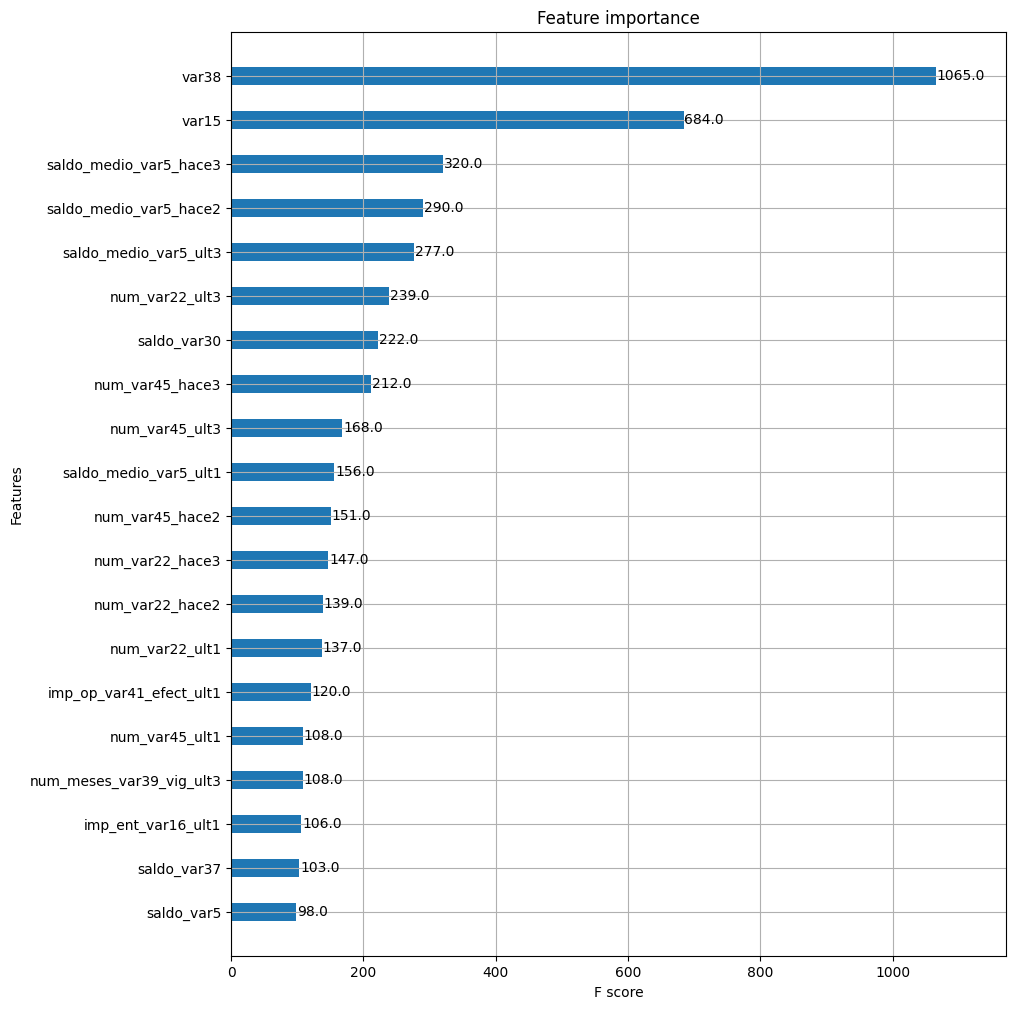

In [45]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# 튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내기
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### [LightGBM 모델 학습과 하이퍼 파라미터 튜닝]

- 앞에서 만들어진 데이터 세트를 기반으로 LightGBM 학습 수행 후 ROC-AUC 측정

In [46]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc')

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_set=evals)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training un

In [47]:
# HyperOpt로 하이퍼 파라미터 튜닝
# 튜닝 대상을 위한 검색 공간 설정
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves',32, 64, 1),
                     'max_depth': hp.quniform('max_depth',100,160,1),
                     'min_child_samples': hp.quniform('min_child_samples',60,100,1),
                     'subsample': hp.uniform('subsample',0.7,1),
                     'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
                     }

In [48]:
def objective_func(search_space):
  lgbm_clf = LGBMClassifier(n_estimators=100,
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'],
                            metric='auc', verbose=0)
  # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
  roc_auc_list=[]

   # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습과 검증용 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 학습 수행
    lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_set=[(X_tr, y_tr),(X_val, y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)

  # 3개 k-fold 로 계산된 roc-auc 값의 평균값을 반환하되,
  # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
  return -1*np.mean(roc_auc_list)

- fmin()으로 최적 하이퍼 파라미터 도출

In [49]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

In [50]:
# fmin() 호출, max_evals 지정 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수
            trials=trials, rstate=np.random.default_rng(seed=30))
print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [51]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'],5),
                          learning_rate=round(best['learning_rate'],5),
                          early_stopping_rounds=100,
                          eval_metric='auc')
# 학습 수행
lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr),(X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

KeyError: 'num_leaves'

## [10] 분류 실습 - 캐글 신용카드 사기 검출

creditcard 데이터
- Class 속성이 매우 불균형한 분포
- Class 0 : 사기가 아닌 정상적인 신용카드 트랜잭션 데이터
- Class 1 : 신용카드 사기 트랜잭션 (약 0.172%)

### [언더 샘플링과 오버 샘플링의 이해]
- 레이블이 불균형한 분포를 가진 데이터 세트를 학습 -> 예측 성능의 문제가 발생할 수 있음 : 이상 레이블을 가진 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생

In [52]:
!pip install imbalanced-learn

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [54]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  df_cleaned = df.dropna()
  return df_cleaned

In [56]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수 생성
def get_train_test_dataset(df=None):
  # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)

  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]

  # train_test_split()으로 학습과 테스트 데이터 분할.
  # stratify=y_target으로 학습 데이터 세트와 테스트 데이터 세트의 레이블 값 분포도가 동일하도록 함.
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [57]:
# 레이블의 학습 데이터에서 1값이 약 0.172%, 레이블의 테스트 데이터에서 1값이 약 0.173%로 큰 차이 없이 잘 분할됨.
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [58]:
# get_clf_eval() 함수를 이용해 평가 수행
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [59]:
# 로지스틱 회귀로 신용카드 사기 여부 예측하기
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85278    17]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8455, 재현율: 0.6284, F1: 0.7209, AUC:0.9575


In [60]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아 학습/예측/평가를 수행하는 함수 생성
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [61]:
# LightGBMClassifier로 학습/예측/평가
# 본 데이터 세트는 극도로 불균형한 레이블 값 분포도를 가졌기 때문에, LGBM 객체 생성시 boost_from_average=False 파라미터 설정 필요.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### [데이터 분포도 변환 후 모델 학습/예측/평가]

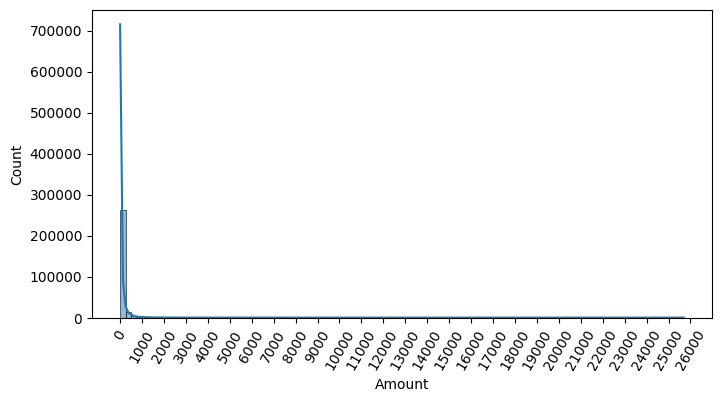

In [62]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

### [데이터 분포도 변환 후 모델 학습/예측/평가 - 정규분포 형태로 변환]

In [63]:
# sklearn.preprocessing의 StandardScaler API 이용

from sklearn.preprocessing import StandardScaler

# 사이킷런 StandardScaler를 이용해 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame의 맨 앞 칼럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

  df_cleaned = df.dropna()
  return df_cleaned

In [64]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85278    17]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8455, 재현율: 0.6284, F1: 0.7209, AUC:0.9575
### LightGBM 예측 성능###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

### [데이터 분포도 변환 후 모델 학습/예측/평가 - 로그변환]

In [65]:
# 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  df_cleaned = df.dropna()
  return df_cleaned

In [66]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능###
오차 행렬
[[85278    17]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8455, 재현율: 0.6284, F1: 0.7209, AUC:0.9575
###LightGBM 예측 성능###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### [(로그 변환 후) 이상치 데이터 제거 후 모델 학습/예측/평가]

<Axes: >

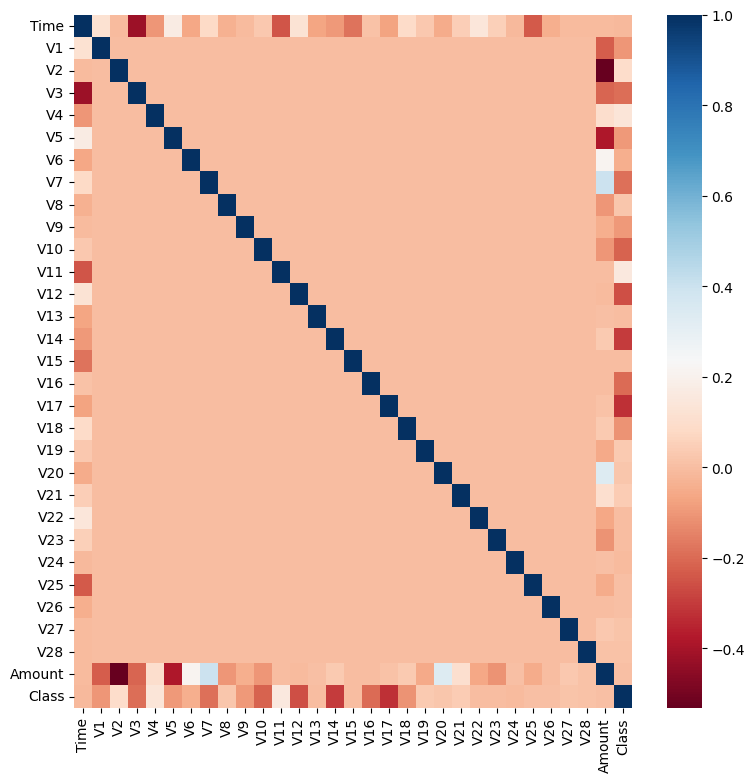

In [67]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [68]:
# 이상치를 검출하는 함수 생성
import numpy as np

def get_outlier(df, column, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index


In [69]:


# V14 칼럼의 이상처 데이터의 index 추출
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [70]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  # 이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [71]:
# Amount 피처를 로그 변환하고, V14 피처의 이상치 데이터를 삭제한 후의 로지스틱 회귀와 LightGBM 모델 예측 성능
# 로지스틱 회귀의 경우, LightGBM의 경우 둘 다 재현율이 크게 증가.
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, F1: 0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [72]:
# SMOTE 적용 후 레이블 값 0과 1의 분포가 동일하게 생성되어 데이터가 2배 가까이 증식됨.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 전 레이블 값 분포:\n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 전 레이블 값 분포:
 Class
0    199020
1       342
Name: count, dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [74]:
# SMOTE 적용 후의 로지스틱 회귀의 예측 성능
# SMOTE 적용 후 로지스틱 회귀모델로 학습시켰더니 정밀도는 크게 저하, 재현율은 크게 향상됨.
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE로 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247, F1: 0.1022, AUC:0.9736


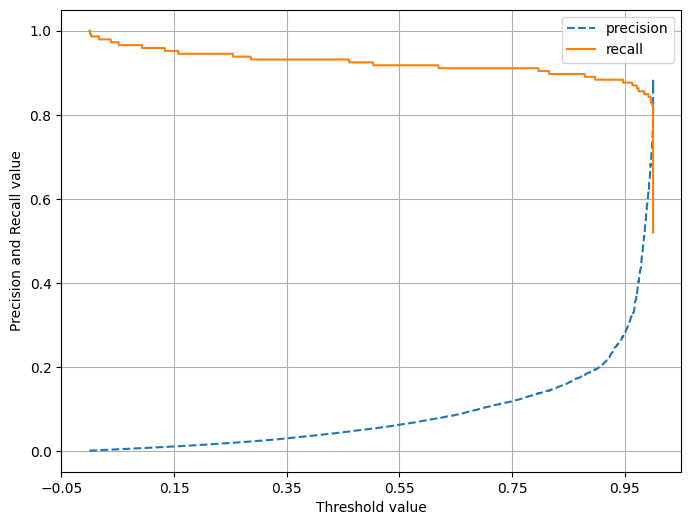

In [75]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값을 각각 plot으로 수행. 정밀도는 점선으로 표시.
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

  # threshold값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.2),2))

  # X축, Y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
# SMOTE 적용 후의 LightGBM의 예측 성능
# 재현율이 Amount 피처를 로그 변환하고, V14 피처의 이상치 데이터를 삭제했을 때였던 0.8288보다도 높아짐.
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)
